<a href="https://colab.research.google.com/github/tohnperfect/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis



In [1]:
import pandas as pd

In [2]:
BFI_data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Factor Analysis'

## Assumptions: 

ในข้อมูล multivariate ที่มีตัวแปร Observe Variables จำนวน n ตัว

มีตัวแปร Factors (Latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้

โดย k < n

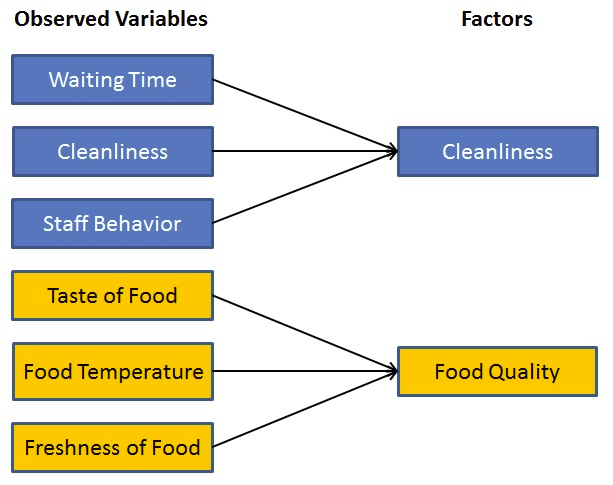



Assumptions ในการทำ Factor Analysis:

* There are no outliers in data.
* Sample size should be greater than the factor.
* There should not be ***perfect multicollinearity***.
* There should not be ***homoscedasticity*** between the variables.

## การทำ Factor Analysis

In [3]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

แก้ error ```ModuleNotFoundError: No module named 'factor_analyzer'``` โดย https://stackoverflow.com/questions/61830329/modulenotfounderror-no-module-named-factor-analyzer-python-notebook

วิธี install package อื่นๆ

In [4]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 4.1MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=04d23904ffae3838f82a14ac306f005115011933fa4995e02718d67c51d74481
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [5]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt  # = from matplotlib import pyplot as plt

## Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...,o3,o4,o5 ด้วยคำสั่ง ```.iloc[]```

In [6]:
BFI_data_dropped = BFI_data.iloc[:,1:-3]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [7]:
BFI_data_dropped = BFI_data_dropped.dropna()

In [8]:
BFI_data_dropped.shape

(2436, 25)

## Bartlett’s test

In [10]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(BFI_data_dropped)

chi_square_value, p_value

(18170.966350869257, 0.0)

## Kaiser-Meyer-Olkin (KMO) Test

ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)

kmo_model

0.8485397221949222

## Factor Analysis

### Import

In [14]:
from factor_analyzer import FactorAnalyzer

### Define

In [20]:
fa = FactorAnalyzer(n_factors=20)

## Fit-transform

In [21]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [22]:
data_fa.shape

(2436, 20)

## วิธีตัดสินว่าเราจะลดเหลือกี่ dimension (มี factors ทั้งหมดกี่ตัว)

In [28]:
ev,v = fa.get_eigenvalues()

### ใช้ eigen values

In [29]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

## scree plot

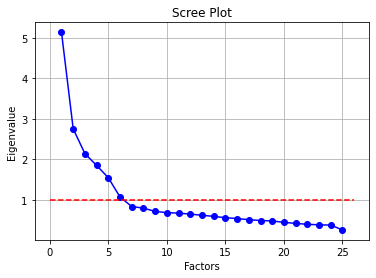

In [37]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [39]:
data_fa[:,:6]

array([[-0.89749664, -0.12809669, -1.22649079,  1.08665877,  0.424767  ,
         0.03981612],
       [ 0.33679355, -0.15018144, -0.04332282, -0.10339331,  0.29665652,
        -1.1101972 ],
       [-0.24521027,  0.8040996 ,  0.39343378, -0.30106518,  0.82703926,
        -0.29820222],
       ...,
       [ 0.38724621, -0.02183595,  1.196168  , -1.19357193,  0.79669499,
        -0.95295099],
       [-0.75695977,  0.94984749,  1.24363476, -1.1523021 ,  2.25341329,
        -1.02186669],
       [-2.35583965, -1.49829858,  0.49436984, -1.64734328,  0.94742314,
         0.43462508]])

## Factor loading

In [41]:
fa.loadings_.shape

(25, 20)